In [7]:
import sys
print(sys.executable)
import pandas as pd

/usr/bin/python3


In [11]:
print("Hello World")
import os
path = os.getcwd()
print(path)

Hello World
/home/kimura/work/sniper/sniper-docker-env/vector_benches/rivec1.0_llvm16/_axpy


In [39]:
scalar_result = pd.read_csv("ooo.s/scalar_ooo/sim.stats.mcpat.output.csv", header=None).T.dropna()
scalar_result.columns=["name", "value"]
print(scalar_result)

                                     name        value
1                   Branch_Predictor-Area    0.0207334
2            Branch_Predictor-GateLeakage  8.15115e-06
3            Branch_Predictor-PeakDynamic    0.0133956
4         Branch_Predictor-RuntimeDynamic  0.000890157
5    Branch_Predictor-SubthresholdLeakage  0.000616727
..                                    ...          ...
213                        Total_L3s-Area      3.73689
214                 Total_L3s-GateLeakage  3.42427e-05
215                 Total_L3s-PeakDynamic     0.166074
216              Total_L3s-RuntimeDynamic  4.98822e-08
217         Total_L3s-SubthresholdLeakage  2.43565e-05

[217 rows x 2 columns]


In [152]:
import glob
csv_files = glob.glob('vio.v.v128_d128/scalar_ooo/sim.stats.mcpat.output.csv')

csv_data = dict()
csv_data['s_ooo'] = pd.read_csv('vio.v.v128_d128/scalar_ooo/sim.stats.mcpat.output.csv',    header=None).T.dropna()
csv_data['s_ooo'].columns=['name', 'value']

csv_data['s_ino'] = pd.read_csv('vio.v.v128_d128/scalar_ino/sim.stats.mcpat.output.csv',    header=None).T.dropna()
csv_data['s_ino'].columns=['name', 'value']

csv_data['v_ooo']  = pd.read_csv('vio.v.v128_d128/vec_ooo/sim.stats.mcpat.output.csv',       header=None).T.dropna()
csv_data['v_ooo'].columns=['name', 'value']

csv_data['v_ino']  = pd.read_csv('vio.v.v128_d128/vec_ino/sim.stats.mcpat.output.csv',       header=None).T.dropna()
csv_data['v_ino'].columns=['name', 'value']

csv_data['v_to_s'] = pd.read_csv('vio.v.v128_d128/vec_to_scalar/sim.stats.mcpat.output.csv', header=None).T.dropna()
csv_data['v_to_s'].columns=['name', 'value']

csv_data['s_to_v'] = pd.read_csv('vio.v.v128_d128/scalar_to_vec/sim.stats.mcpat.output.csv', header=None).T.dropna()
csv_data['s_to_v'].columns=['name', 'value']


In [154]:
e_elem = dict()
e_elem['vio_fence'] = dict()
e_elem['vio_fence']['fetch']  = ['s_ooo:Instruction_Fetch_Unit']
e_elem['vio_fence']['rename'] = ['s_ooo:Renaming_Unit']
e_elem['vio_fence']['s_exe']  = ['s_ooo:Floating_Point_Units__FPUs___Count', 
                                 's_ooo:Integer_ALUs__Count', 
                                 's_ooo:Results_Broadcast_Bus', 
                                 's_ooo:Register_Files']
e_elem['vio_fence']['v_exe']  = ['v_ooo:Floating_Point_Units__FPUs___Count', 
                                 'v_ooo:Results_Broadcast_Bus', 
                                 'v_ooo:Register_Files']
e_elem['vio_fence']['s_lsq'] = []
e_elem['vio_fence']['v_lsq'] = []
e_elem['vio_fence']['dcache'] = ['s_ooo:Data_Cache']

e_elem['vio_proposal'] = dict()
e_elem['vio_proposal']['fetch']  = ['s_ooo:Instruction_Fetch_Unit']
e_elem['vio_proposal']['rename'] = ['s_ooo:Renaming_Unit']
e_elem['vio_proposal']['s_exe']  = ['s_ooo:Floating_Point_Units__FPUs___Count', 
                                 's_ooo:Integer_ALUs__Count', 
                                 's_ooo:Results_Broadcast_Bus', 
                                 's_ooo:Register_Files']
e_elem['vio_proposal']['v_exe']  = ['v_ooo:Floating_Point_Units__FPUs___Count', 
                                 'v_ooo:Results_Broadcast_Bus', 
                                 'v_ooo:Register_Files']
e_elem['vio_proposal']['s_lsq'] = ['s_ooo:LoadQ', 's_ooo:StoreQ']
e_elem['vio_proposal']['v_lsq'] = []
e_elem['vio_proposal']['dcache'] = ['s_ooo:Data_Cache']

e_elem['all_ooo'] = dict()
e_elem['all_ooo']['fetch']  = ['s_ooo:Instruction_Fetch_Unit']
e_elem['all_ooo']['rename'] = ['s_ooo:Renaming_Unit', 
                              'v_ooo:Renaming_Unit']
e_elem['all_ooo']['s_exe']  = ['s_ooo:Floating_Point_Units__FPUs___Count', 
                                 's_ooo:Integer_ALUs__Count', 
                                 's_ooo:Results_Broadcast_Bus', 
                                 's_ooo:Register_Files']
e_elem['all_ooo']['v_exe']  = ['v_ooo:Floating_Point_Units__FPUs___Count', 
                                 'v_ooo:Results_Broadcast_Bus', 
                                 'v_ooo:Register_Files']
e_elem['all_ooo']['s_lsq'] = ['s_ooo:LoadQ', 's_ooo:StoreQ']
e_elem['all_ooo']['v_lsq'] = ['v_ooo:LoadQ', 'v_ooo:StoreQ']
e_elem['all_ooo']['dcache'] = ['s_ooo:Data_Cache']

<Axes: >

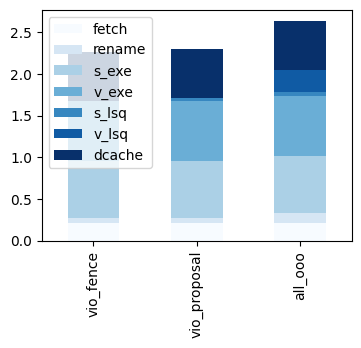

In [153]:
graph_dict = dict()

for e in e_elem:
    graph_dict[e] = dict()
    for p in e_elem[e]:
        power = 0
        for m in e_elem[e][p] :
            (conf, module) = m.split(':')
            area = csv_data[conf][csv_data[conf]['name'].str.contains(module + '-Area')].iloc[0]['value']
            power = power + float(area)
        graph_dict[e][p] = power
    
graph_pd = pd.DataFrame(graph_dict).T

graph_pd.plot.bar(figsize=(4,3), stacked=True, cmap='Blues')

In [238]:
import sqlite3

def get_result(conf, vlen, dlen):
    sql3_conn = sqlite3.connect('%s.v%s_d%s/sim.stats.sqlite3' % (conf, vlen, dlen))
    time_by_core0_index = sql3_conn.execute("SELECT * FROM 'names' WHERE objectname='thread' AND metricname='time_by_core[0]'").fetchall()[0][0]
    roi_begin_index = sql3_conn.execute("SELECT * FROM 'prefixes' WHERE prefixname='roi-begin'").fetchall()[0][0]
    roi_end_index = sql3_conn.execute("SELECT * FROM 'prefixes' WHERE prefixname='roi-end'").fetchall()[0][0]
    
    start_time = sql3_conn.execute("SELECT * FROM 'values' WHERE prefixid='%s' AND nameid='%s'" \
                    % (roi_begin_index, time_by_core0_index)).fetchall()[0][3]
    stop_time = sql3_conn.execute("SELECT * FROM 'values' WHERE prefixid='%s' AND nameid='%s'" \
                    % (roi_end_index, time_by_core0_index)).fetchall()[0][3]
    cycle = stop_time - start_time
    return cycle

In [250]:
reg_conf = [[128, 128], [512, 128], [512, 512]]  # VLEN, DLEN
pipe_conf = ['ooo.v', 'vio.v', 'vio.v.fence', 'vio.v.ngs']
for r in reg_conf:
    conf_cycle = []
    for p in pipe_conf:
        conf_cycle.append(get_result(p, r[0], r[1]))
    print(conf_cycle)
    print(list(map(lambda e: min(conf_cycle) / e, conf_cycle)))

[16787000000, 29739000000, 32867500000, 29739000000]
[1.0, 0.5644776219778742, 0.5107476990948505, 0.5644776219778742]
[26658500000, 30609000000, 30615500000, 30609000000]
[1.0, 0.8709366526185109, 0.870751743397952, 0.8709366526185109]
[9791500000, 13648000000, 14431500000, 13648000000]
[1.0, 0.7174311254396248, 0.6784811003707168, 0.7174311254396248]
